In [12]:
import os

In [13]:
os.getcwd() ## Checking the Current Directory
os.listdir() ## Checking the file list

['.ipynb_checkpoints',
 'Assingment 2_EDA_Tahmid.ipynb',
 'Merged_Table_3sigma_cleaned.xlsx']

In [14]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading Data file Cleaned Data
df = pd.read_excel("Merged_Table_3sigma_cleaned.xlsx")


In [15]:
## Overserving Top 5 Rows 
df.head()

,Sales Date,Scan-to-Buy Time,Item Code,Sales Volume (kilograms),Sales Unit Price (CNY/kg),Sales Type,Are discounts available?,Classification Code,Classification Name,Date,Wholesale Price (CNY/kg),Wastage Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,Sold,No,1011010504,Pepper varieties,2022-02-14,10.00,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,Sold,No,1011010101,Variegated plants,2023-06-30,2.53,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,Sold,No,1011010504,Pepper varieties,2022-02-14,10.00,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,Sold,No,1011010101,Variegated plants,2023-06-30,4.09,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,Sold,No,1011010101,Variegated plants,2023-06-28,4.62,13.70


In [16]:
## Seeing if any missing values exist 
df.isnull().sum()
## Seeing the percentage of the missing values for each column
df.isnull().mean()*100


Sales Date                   0.0
Scan-to-Buy Time             0.0
Item Code                    0.0
Sales Volume (kilograms)     0.0
Sales Unit Price (CNY/kg)    0.0
Sales Type                   0.0
Are discounts available?     0.0
Classification Code          0.0
Classification Name          0.0
Date                         0.0
Wholesale Price (CNY/kg)     0.0
Wastage Rate (%)             0.0
dtype: float64

In [17]:
## Seeing the datatypes for the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851424 entries, 0 to 851423
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Sales Date                 851424 non-null  datetime64[ns]
 1   Scan-to-Buy Time           851424 non-null  object        
 2   Item Code                  851424 non-null  int64         
 3   Sales Volume (kilograms)   851424 non-null  float64       
 4   Sales Unit Price (CNY/kg)  851424 non-null  float64       
 5   Sales Type                 851424 non-null  object        
 6   Are discounts available?   851424 non-null  object        
 7   Classification Code        851424 non-null  int64         
 8   Classification Name        851424 non-null  object        
 9   Date                       851424 non-null  datetime64[ns]
 10  Wholesale Price (CNY/kg)   851424 non-null  float64       
 11  Wastage Rate (%)           851424 non-null  float64 

In [18]:
# Descriptive Statistical Analysis
df.describe()

,Sales Date,Item Code,Sales Volume (kilograms),Sales Unit Price (CNY/kg),Classification Code,Date,Wholesale Price (CNY/kg),Wastage Rate (%)
count,851424,8.514240e+05,851424.000000,851424.000000,8.514240e+05,851424,851424.000000,851424.000000
mean,2021-11-22 19:03:49.338143744,1.030353e+14,0.531348,8.506917,1.011010e+09,2023-05-12 06:05:47.457436672,6.020302,9.880338
min,2020-07-01 00:00:00,1.029000e+14,-0.662000,0.100000,1.011010e+09,2020-08-13 00:00:00,0.010000,0.000000
25%,2021-02-05 00:00:00,1.029000e+14,0.295000,4.900000,1.011010e+09,2023-06-13 00:00:00,3.120000,6.270000
50%,2021-10-15 00:00:00,1.029000e+14,0.438000,7.600000,1.011010e+09,2023-06-30 00:00:00,4.620000,9.430000
75%,2022-09-13 00:00:00,1.029000e+14,0.748000,10.000000,1.011011e+09,2023-06-30 00:00:00,8.420000,13.620000
max,2023-06-30 00:00:00,1.069740e+14,1.736000,27.800000,1.011011e+09,2023-06-30 00:00:00,16.060000,22.270000
std,NaN,7.278616e+11,0.310922,5.001625,2.599103e+02,NaN,3.753374,4.305168


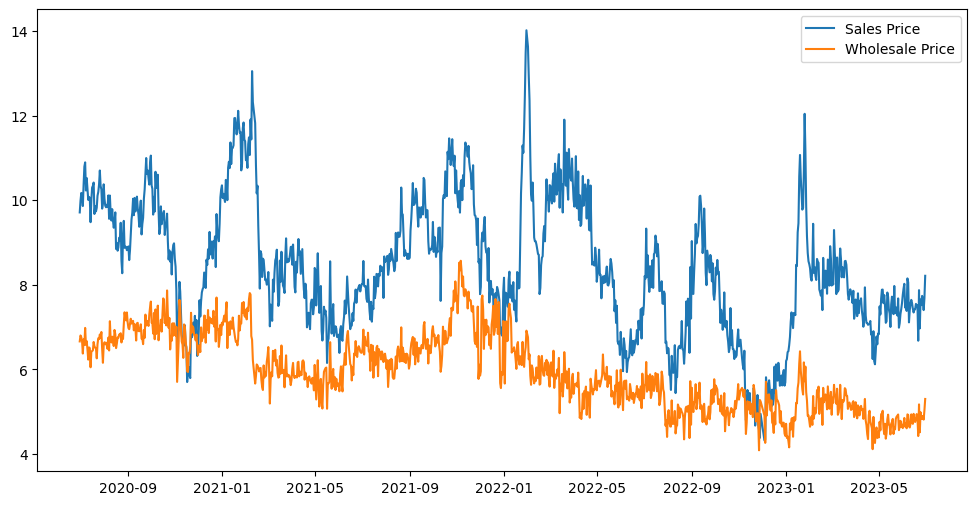

In [24]:
# CreatING a revenue column
df['Revenue'] = df['Sales Volume (kilograms)'] * df['Sales Unit Price (CNY/kg)']

# Daily totals
daily = df.groupby('Sales Date').agg({
    'Sales Volume (kilograms)': 'sum',
    'Revenue': 'sum',
    'Sales Unit Price (CNY/kg)': 'mean'
}).reset_index()

## Plotting Sales Price and Wholesale Price Per Kg through Sales Date
plt.figure(figsize=(12,6))
plt.plot(daily['Sales Date'], daily['Sales Unit Price (CNY/kg)'], label="Sales Price")
plt.plot(daily['Sales Date'], df.groupby('Sales Date')['Wholesale Price (CNY/kg)'].mean().values, label="Wholesale Price")
plt.legend()
plt.show()

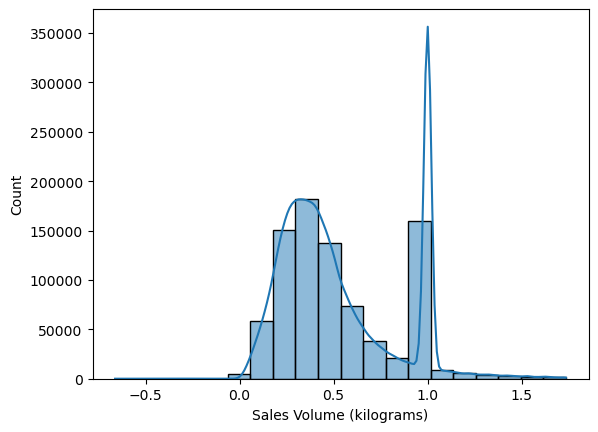

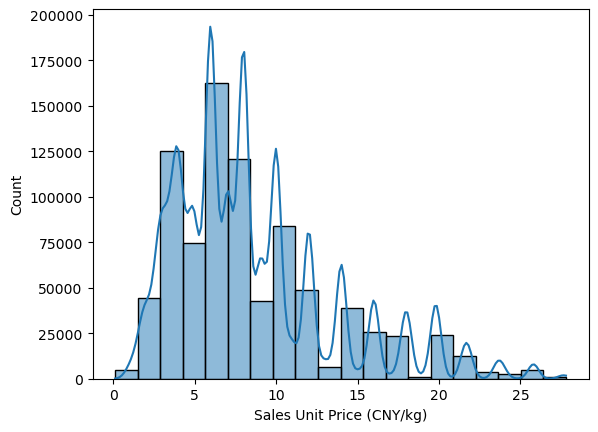

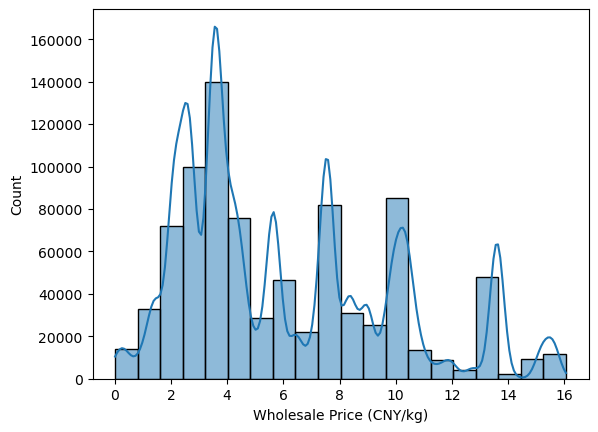

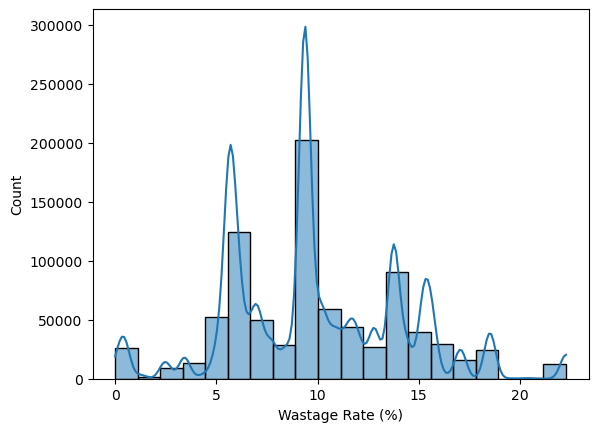

In [25]:
## Histogram for numerical variables
sns.histplot(data=df, x="Sales Volume (kilograms)", bins=20, kde = True)
plt.show()
sns.histplot(data=df, x="Sales Unit Price (CNY/kg)", bins=20, kde = True)
plt.show()
sns.histplot(data=df, x="Wholesale Price (CNY/kg)", bins=20, kde = True)
plt.show()
sns.histplot(data=df, x="Wastage Rate (%)", bins=20, kde = True)
plt.show()


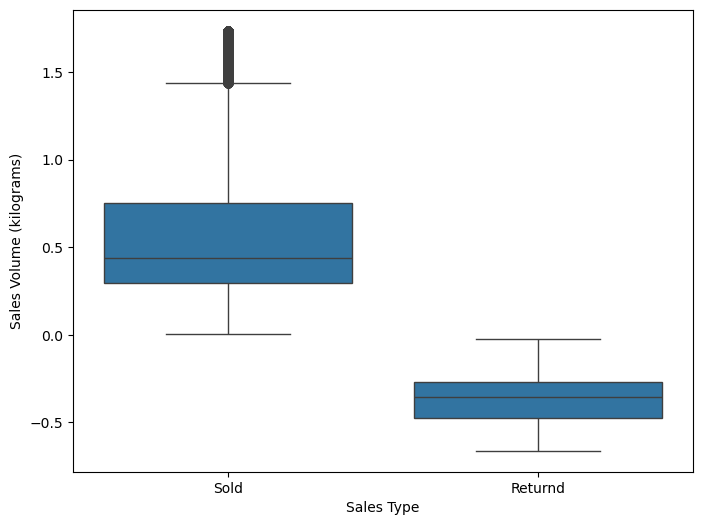

In [26]:
## Box plot for Sales Volume based on Sales and Return
plt.figure(figsize=(8,6))
sns.boxplot(x="Sales Type", y="Sales Volume (kilograms)", data=df)
plt.show()
